In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, minmax_scale
from sklearn.metrics import r2_score

In [2]:
msft_df = pd.read_csv('dataset/MSFT.csv')

In [3]:
msft_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-08-16,293.190002,294.820007,290.019989,294.600006,292.213959,22507600
1,2021-08-17,292.390015,293.429993,291.079987,293.079987,290.706207,20075300
2,2021-08-18,292.040009,294.820007,290.269989,290.730011,288.927338,21813000
3,2021-08-19,288.690002,297.470001,288.640015,296.769989,294.929871,29850500
4,2021-08-20,299.720001,305.839996,298.059998,304.359985,302.472809,40817600


In [5]:
# msft_df.Date.unique()

In [10]:
msft_df.Date = pd.to_datetime(msft_df.Date)
msft_df['Year'] = pd.DatetimeIndex(msft_df.Date).year

In [12]:
msft_df['Month'] = pd.DatetimeIndex(msft_df.Date).month

In [13]:
msft_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month
0,2021-08-16,293.190002,294.820007,290.019989,294.600006,292.213959,22507600,2021,8
1,2021-08-17,292.390015,293.429993,291.079987,293.079987,290.706207,20075300,2021,8
2,2021-08-18,292.040009,294.820007,290.269989,290.730011,288.927338,21813000,2021,8
3,2021-08-19,288.690002,297.470001,288.640015,296.769989,294.929871,29850500,2021,8
4,2021-08-20,299.720001,305.839996,298.059998,304.359985,302.472809,40817600,2021,8


### Open, Close & Adj Close trends

In [28]:
def get_open_by_month(month : int, year: int):
    return msft_df.groupby(['Month', 'Year']).get_group((month, year))['Open'].sum()

In [29]:
get_open_by_month(9, 2021)

6256.9700619999985

In [30]:
get_open_by_month(10, 2021)

6338.989958

In [31]:
get_open_by_month(2, 2022)

5672.959991999999

In [55]:
open_dict = {}
for i in range(8):
    open_dict[i+1] = msft_df.groupby(['Month', 'Year']).get_group((i+1, 2022))['Open'].sum()

In [58]:
close_dict = {}
for i in range(8):
    close_dict[i+1] = msft_df.groupby(['Month', 'Year']).get_group((i+1, 2022))['Close'].sum()

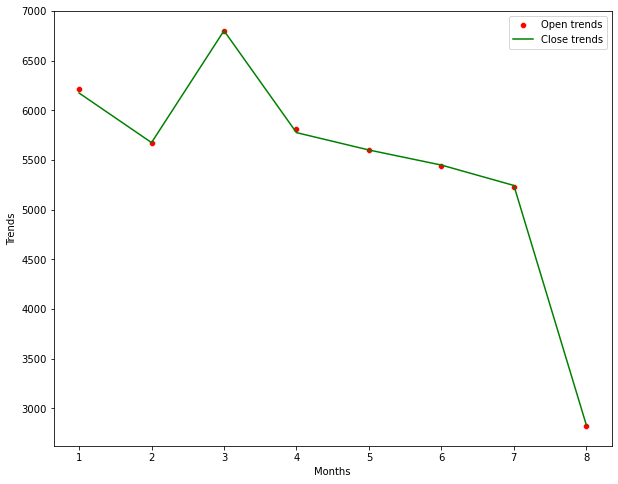

In [67]:
plt.figure(figsize=(10, 8))
sns.scatterplot(open_dict.keys(), open_dict.values(), color='red', label='Open trends')
sns.lineplot(close_dict.keys(), close_dict.values(), color='green', label='Close trends')
plt.xlabel('Months')
plt.ylabel('Trends')
plt.show()

In [65]:
adj_close_dict = {}
for i in range(8):
    adj_close_dict[i+1] = msft_df.groupby(['Month', 'Year']).get_group((i+1, 2022))['Adj Close'].sum()

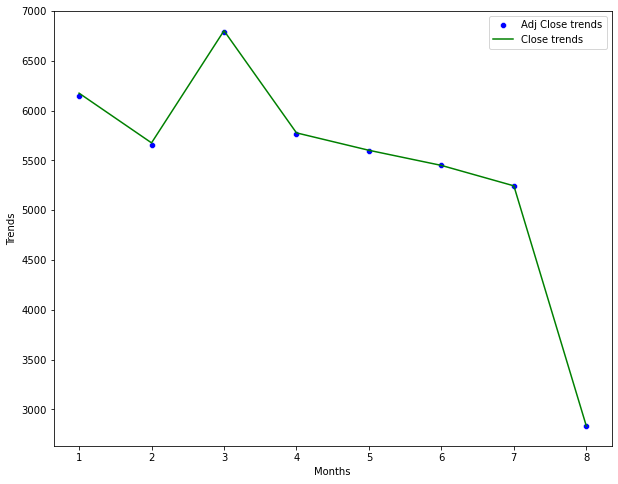

In [68]:
plt.figure(figsize=(10, 8))
sns.scatterplot(adj_close_dict.keys(), adj_close_dict.values(), color='blue', label='Adj Close trends')
sns.lineplot(close_dict.keys(), close_dict.values(), color='green', label='Close trends')
plt.xlabel('Months')
plt.ylabel('Trends')
plt.show()

### Volume Trends

In [78]:
vol_dict = {}
for i in range(8):
    vol_dict[i+1] = msft_df.groupby(['Month', 'Year']).get_group((i+1, 2022))['Volume'].sum()/30

In [80]:
# vol_dict

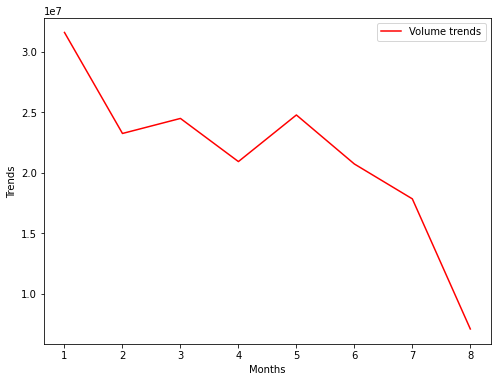

In [83]:
plt.figure(figsize=(8, 6))
sns.lineplot(vol_dict.keys(), vol_dict.values(), color='red', label='Volume trends')
plt.xlabel('Months')
plt.ylabel('Trends')
plt.show()

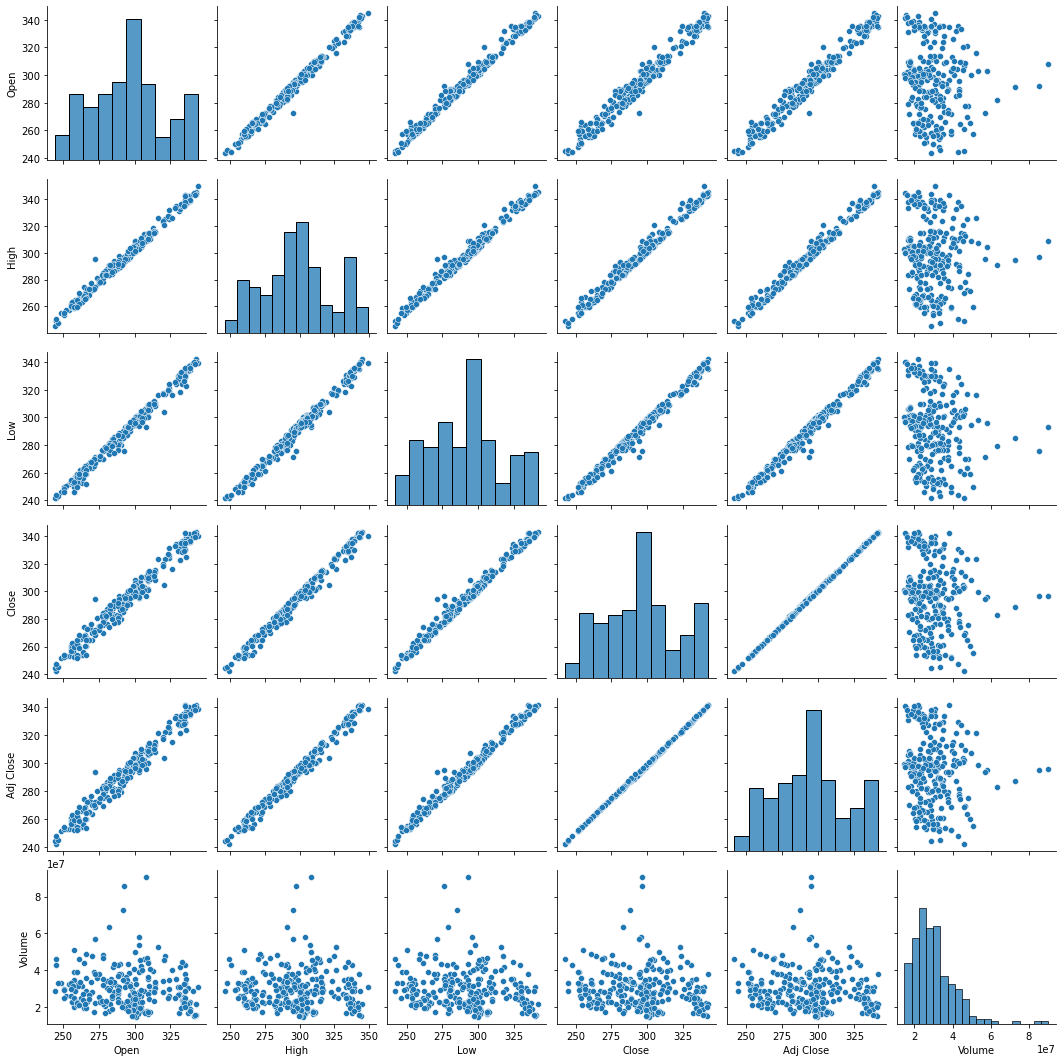

In [86]:
sns.pairplot(data = msft_df.iloc[:, 1:7])

## Correlation

In [87]:
msft_df.corr()

,Open,High,Low,Close,Adj Close,Volume,Year,Month
Open,1.000000,0.994522,0.992484,0.982792,0.982190,-0.102252,-0.614117,0.366571
High,0.994522,1.000000,0.992338,0.991807,0.991597,-0.071766,-0.604014,0.356379
Low,0.992484,0.992338,1.000000,0.992487,0.991841,-0.161328,-0.640161,0.399802
Close,0.982792,0.991807,0.992487,1.000000,0.999809,-0.121535,-0.624437,0.385124
Adj Close,0.982190,0.991597,0.991841,0.999809,1.000000,-0.120931,-0.613978,0.381313
Volume,-0.102252,-0.071766,-0.161328,-0.121535,-0.120931,1.000000,0.362838,-0.487175
Year,-0.614117,-0.604014,-0.640161,-0.624437,-0.613978,0.362838,1.000000,-0.838278
Month,0.366571,0.356379,0.399802,0.385124,0.381313,-0.487175,-0.838278,1.000000


<AxesSubplot:>

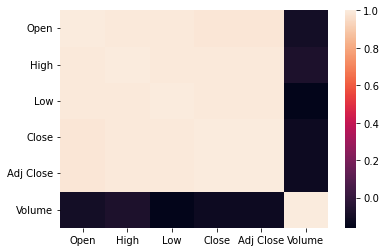

In [89]:
sns.heatmap(msft_df.iloc[:, 1:7].corr())

## Linear Regression

In [91]:
linear_df = msft_df.iloc[:, 1:7]

#### Detecting outliers

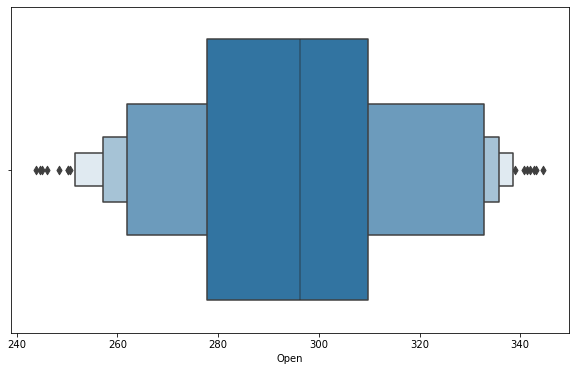

In [106]:
plt.figure(figsize=(10, 6))
sns.boxenplot(linear_df.Open)
plt.show()

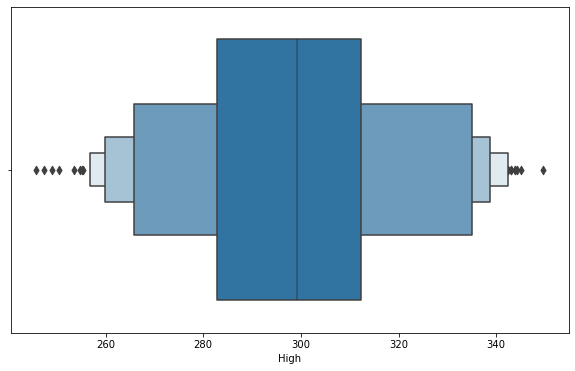

In [108]:
plt.figure(figsize=(10, 6))
sns.boxenplot(linear_df.High)
plt.show()

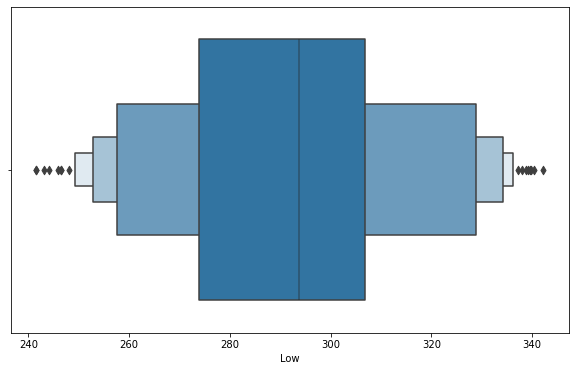

In [109]:
plt.figure(figsize=(10, 6))
sns.boxenplot(linear_df.Low)
plt.show()

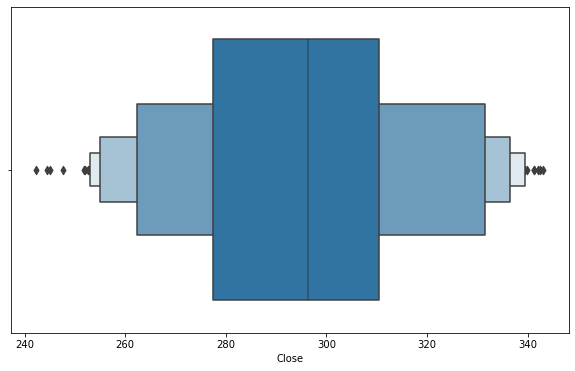

In [110]:
plt.figure(figsize=(10, 6))
sns.boxenplot(linear_df.Close)
plt.show()

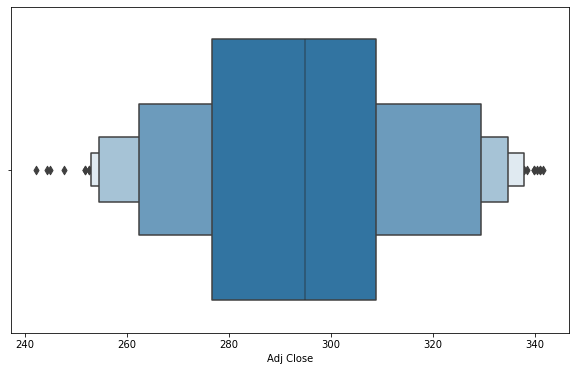

In [111]:
plt.figure(figsize=(10, 6))
sns.boxenplot(linear_df['Adj Close'])
plt.show()

#### Removing outliers

In [125]:
ss = StandardScaler()

In [126]:
linear_df = ss.fit_transform(linear_df)

In [130]:
linear_df = pd.DataFrame(linear_df)

In [131]:
linear_df.shape

(251, 6)

In [132]:
X = linear_df.iloc[:, 0:-1]
y = linear_df.iloc[:, -1]

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [134]:
lm.fit(X_train, y_train)

LinearRegression()

In [135]:
lm.coef_

array([-0.63649761,  6.64205233, -6.24005591,  6.14540628, -6.02529266])

In [136]:
lm.intercept_

-0.019851603343602364

#### Scoring and Predictions

In [141]:
predict = lm.predict(X_test)

In [143]:
lm.score(X_train, y_train)

0.5634188220182463

In [142]:
r2_score(y_test, predict)

0.45283933118220265